## Contents:
**1. Import Necessary Libraries**  
**2. Read in and Explore the Data**  
**3. Data Analysis**  
**4. Data Visualization**  
**5. Cleaning Data**  
**6. Choosing the Best Model**  

### 1) Load Packages

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print("PACKAGES IS LOADED")


PACKAGES IS LOADED


### 2) Read in and Explore the Data

In [2]:
train = pd.read_csv("train.csv", encoding= "UTF-8", index_col= 0)
test = pd.read_csv("test.csv", encoding="UTF-8", index_col = 0)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3) Data Analysis

In [3]:
print("Train Data 수 :",train.shape)
print("Test Data 수 :", test.shape)
print("칼럼 종류 :",train.columns)


Train Data 수 : (891, 11)
Test Data 수 : (418, 10)
칼럼 종류 : Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.sample(5)
# Numberical : Age, Fare, SibSp, Parch
# Categorical : Survived, Sex, Embarked, Pclass
# Alphaunumerical: Ticket, Cabin, Name

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S


In [5]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Balkic, Mr. Cerin",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


이름이 다 다르며, ticket도 너무 종류가 많다. -> 삭제   
cabin의 경우 na가 많고  
embarked의 경우 s가 다수이다.  

In [6]:
# NA Check
print("train set na 수 :")
print(train.isna().sum()) 

train set na 수 :
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [7]:
print(test.isna().sum()) # del name, ticket, cabin 
# interpolate age, fare, embarked
# sex to dummy
# sissp + parch = family num

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


### Data Analysis

**1. Age, Cabin, Embarked 칼럼에 있는 NA 처리여부**  
**2. Ticket, Name, Cabin 문자의 의미여부**  
**3. 칼럼들의 유미성 시각화**

In [8]:
train['Survived']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [11]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Category Variables

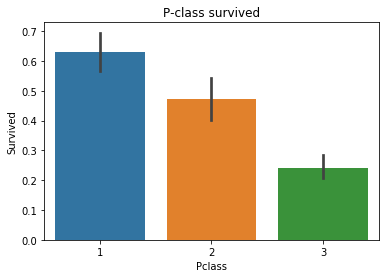

P-Class Numbers
 1    216
2    184
3    491
Name: Pclass, dtype: int64


In [44]:
#1. pclass

sns.barplot(
    data= train,
    x= "Pclass",
    y= "Survived",
    
)
plt.title("P-class survived")
plt.show()
print("P-Class Numbers\n",train['Pclass'].value_counts(sort = False))

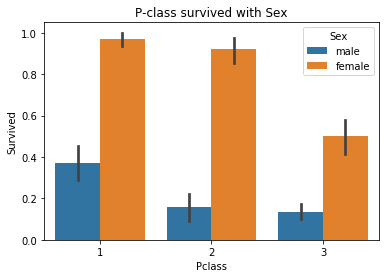

Sex Numbers
 female    314
male      577
Name: Sex, dtype: int64


In [46]:
sns.barplot(
    data= train,
    x= "Pclass",
    y= "Survived",
    hue = 'Sex')
plt.title("P-class survived with Sex")
plt.show()
print("Sex Numbers\n",train['Sex'].value_counts(sort = False))

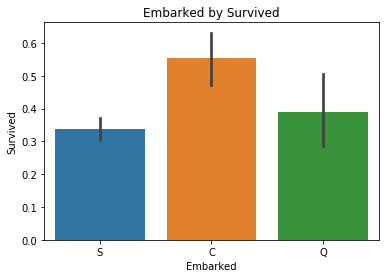

Embarked Numbers
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [52]:
sns.barplot(
    data= train,
    x= "Embarked",
    y= "Survived")
plt.title("Embarked by Survived")
plt.show()
print("Embarked Numbers\n",train['Embarked'].value_counts())

1. P-Class by Survived : P-Class가 높을수록 생존률이 높다.
2. P-Class by Survived with Sex : 성별이 여자인 경우 생존률이 높다. 하지만 P-Class 3등급은 여자도 잘 생존하지 못하였다.
3. Embarked : 유의미성이 크게 차이를 보이지 않지만, c의 경우 더 높은 모습을 보여준다. Pcalss가 1,2인 겨우는 s가 더 많지만 c가 더 생존률이 높게 나온다.

#### Numeric Variables

In [50]:
train.columns
# age, fare, sipsp, parch
# 1. 분포 확인
# 1. age와 생존여부 -> age별 생존여부 histogram?
# 2. fare과 생존여부 -> fare별 생존여부 histogram
# 3. sipsp나 parch가 의미가 있을까?  -> histo
# 3. sipsp과 parch의 상관관계 및 나머지 변수간 heapmap

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

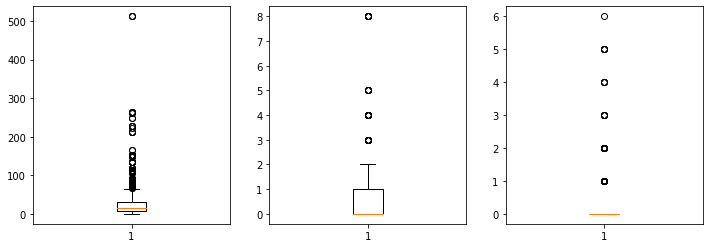

In [17]:
# 1, 분포확인
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(train['Fare']) # fare의 경우 outlier가 더 많음
ax2.boxplot(train['SibSp'])# of siblings / spouses aboard the Titanic
ax3.boxplot(train['Parch'])# of parents / children aboard the Titanic
plt.show()


SipSp와 Parch의 경우,평균이나 최저가 0에 가까운 숫자를 보인다.

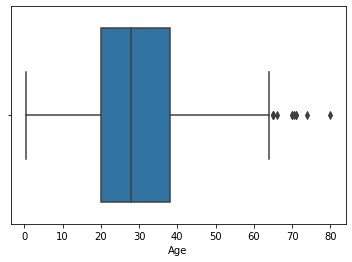

In [19]:

sns.boxplot(x="Age", 
            data=train)

plt.show()

In [52]:
train_with_survived = train.loc[train['Survived']==1]
train_with_survived.shape

(342, 11)

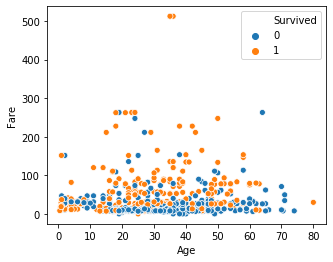

In [48]:
# 2. fare와 age에 따른 생존률의 비교 scatterplot
fig = plt.figure(figsize=(5,4))
sns.scatterplot(x='Age', y="Fare", hue="Survived", data=train)
plt.show()

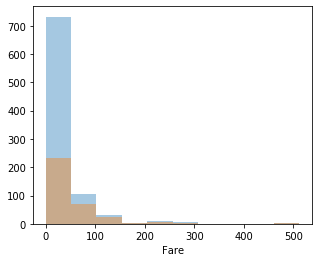

In [86]:
# 2. Fare와 생존률
fig = plt.figure(figsize=(5,4))
sns.distplot(train['Fare'],kde = False,bins=10)#, #hue="")o
sns.distplot(train_with_survived['Fare'], kde = False,bins=10)#, #hue="")
plt.show()
#sns.distplot(train)
#sns.distplot(train_to_visual['Age'], hue = 'Survived')#, #hue="")


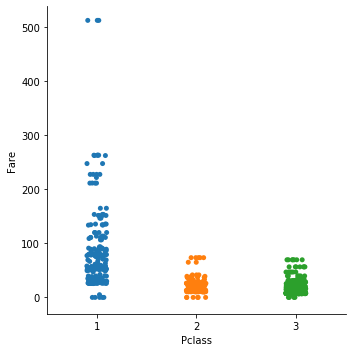

In [70]:
sns.catplot(x="Pclass", y="Fare", data=train)

Histogram을 통해 비교한 결과, 큰 차이를 파악하기 어려웠지만, fare가 높은 사람일수록  
PClass가 높을 확률이 높고 그에 따라서, 생존률이 높았을 가능성이 존재한다.

In [ ]:
# Age와 생존률, age의 na를 제거해야한다.
train_to_visual = train[['Survived','Age']].dropna()
train_to_visual_survived = train_to_visual.loc[train_to_visual['Survived']==1]
print("data size\n"+ "na제거 데이터 수: ",train_to_visual.shape, "\n생존인 경우 데이터 수 ",train_to_visual_survived.shape)

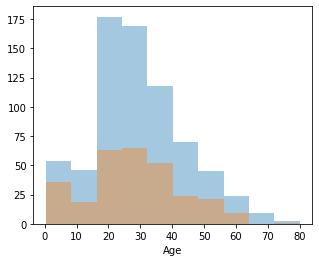

In [85]:
fig = plt.figure(figsize=(5,4))
sns.distplot(train_to_visual['Age'],kde = False,bins=10)#, #hue="")o
sns.distplot(train_to_visual_survived['Age'], kde = False,bins=10)#, #hue="")
plt.show()

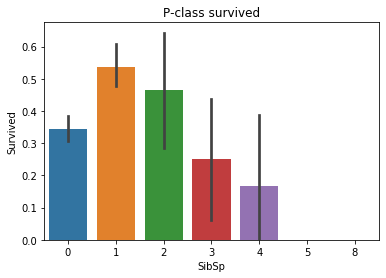

P-Class Numbers
 1    216
2    184
3    491
Name: Pclass, dtype: int64


In [92]:
#4. SibSp와 Parch
sns.barplot(
    data= train,
    x= "SibSp",
    y= "Survived",
    
)
plt.title("Sibsp survived")
plt.show()


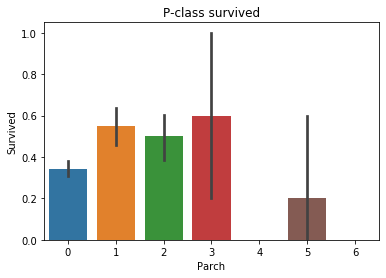

In [93]:
sns.barplot(
    data= train,
    x= "Parch",
    y= "Survived",
    
)
plt.title("Parch survived")
plt.show()


3.5 0.5


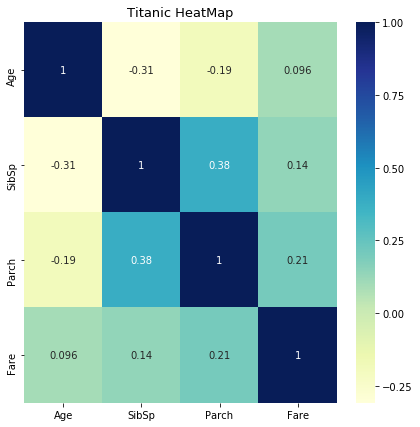

In [129]:
#train[train.columns[1:-2]]
plt.figure(figsize=(7,7))

ax =sns.heatmap(train[['Age', 'SibSp', 'Parch','Fare']].dropna().corr(),cmap='YlGnBu',annot = True,)
buttom,top = ax.get_ylim()
print(buttom,top)
ax.set_ylim(buttom +0.5, top-0.5)
plt.title('Titanic HeatMap', fontsize=13)
plt.show()



#출처: https://rfriend.tistory.com/419 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
#print(train.columns)
#print(train.columns[1:-2])# - train.columns[-2])
#train_to_heatmap = train

# CLEANING DATA

In [11]:
# DELETE NAME TICKET, CABIN
del_columns = ['Name', 'Ticket', 'Cabin']
train.drop(del_columns, axis=1, inplace =True)
test.drop(del_columns, axis=1, inplace = True)
print("columns is %s" %train.columns)

columns is Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [12]:
train['Age'].fillna(value = train['Age'].mean(), inplace=True)
print(train.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [13]:
print(pd.get_dummies(train['Embarked']).sum()) # so i will choose 'S'
train['Embarked'].fillna(value = 'S', inplace= True)
print("TRAIN NA SUM IS %s" %train.isna().sum().sum())

C    168
Q     77
S    644
dtype: int64
TRAIN NA SUM IS 0


In [14]:
test['Age'].fillna(value = test['Age'].mean(), inplace =True)
test['Fare'].fillna(value = test['Fare'].mean(), inplace = True)
test.isna().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
pcl = pd.get_dummies(train['Pclass'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)
emb = pd.get_dummies(train['Embarked'], drop_first=True)

In [16]:
train2 =pd.concat([train, pcl, sex, emb], axis=1)
train2.columns
del_columns2 = ['Pclass', 'Sex', 'Embarked']
train2.drop(del_columns2, axis=1, inplace= True)

In [17]:
y_train = train2['Survived']
y_train
train2.drop(['Survived'], axis=1, inplace =True)


In [18]:
pcl2 = pd.get_dummies(test['Pclass'], drop_first=True)
sex2 = pd.get_dummies(test['Sex'], drop_first=True)
emb2 = pd.get_dummies(test['Embarked'], drop_first=True)
test2 = pd.concat([test, pcl2, sex2, emb2], axis=1)
test2.drop(del_columns2, axis=1, inplace = True)
test2.shape
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# age, fare 정규화
train2['Age'] = (train2['Age']- train2['Age'].mean())/train2['Age'].std()
#train2['Age'].Describe()
#pd.DataFrame.describe(train2['Age'])
train2['Fare'] = (train2['Fare'] - train2['Fare'].mean())/train2['Fare'].std()
train2.columns
train2.isna().sum()
train2.dtypes

test2['Age'] = (test['Age'] - test['Age'].mean())/test['Age'].std()
est2['Fare'] = (test['Fare'] - test['Fare'].mean())/ test['Fare'].std()

print(train2.shape, test2.shape)
print("train columns : %s \ntest columns: %s" %(train2.columns , test2.columns))


NameError: name 'est2' is not defined

In [ ]:
y_train.shape
train2.shape

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
test_tmp = pd.read_csv(cwd + r"\gender_submission.csv")


In [ ]:
y_test = test_tmp['Survived']
y_test

In [ ]:
a = []
b = []
c = [0.1, 1, 10]
for i in c:
    log = LogisticRegression(C= i)
    log.fit(train2, y_train)
    a +=[accuracy_score(log.predict(train2), y_train)]
    b +=[accuracy_score(log.predict(test2), y_test)]




In [ ]:
print(a)
print(b)

In [ ]:
print(confusion_matrix(y_train, log.predict(train2)))
print(classification_report(y_train, log.predict(train2))
print(roc_auc_score(y_train, log.predict(train2)))

In [ ]:
log1 = LogisticRegression(C=1)
log1.fit(train2, y_train)
accuracy_score(log1.predict(train2), y_train)
accuracy_score(log1.predict(test2), y_test)
confusion_matrix(log1.predict(test2), y_test)
print(classification_report(log1.predict(test2), y_test))


In [ ]:
roc_auc_score(log1.predict(test2), y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 


print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))
[[0.66666667 0.33333333]]

In [ ]:
d= []
e = []
f = [3,5,7,2]
for i in f:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train2, y_train) 
    d +=[accuracy_score(neigh.predict(train2), y_train)]
    e +=[accuracy_score(neigh.predict(test2), y_test)]



In [ ]:
print(d)
print(e)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree
a = []
b = []
c = [0.1, 1, 10]
for i in c:
    tree = DecisionTreeClassifier(max_iter = , )
    tree.fit(train2, y_train)
    log.fit(train2, y_train)
    a +=[accuracy_score(log.predict(train2), y_train)]
    b +=[accuracy_score(log.predict(test2), y_test)]


In [ ]:
# SVC
a = []
b = []
c = [0.1, 1, 10]
for i in c:
    clf = SVC(kernel =  )
    tree.fit(train2, y_train)
    log.fit(train2, y_train)
    a +=[accuracy_score(log.predict(train2), y_train)]
    b +=[accuracy_score(log.predict(test2), y_test)]
